# Experiments with kernel machines

In this notebook we will use simple two-dimensional data sets to illustrate the behavior of the support vector machine and the Perceptron, when used with quadratic and RBF kernels.

## 1. Basic training procedure

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

The directory containing this notebook should also contain two-dimensional data files, `data1.txt` through `data5.txt`. These files contain one data point per line, along with a label (either -1 or 1), like:
* `3 8 -1` (meaning that point `x=(3,8)` has label `y=-1`)

The next procedure, **learn_and_display_SVM**, loads one of these data sets, invokes `sklearn.SVC` to learn a classifier, and then displays the data as well as the boundary. It is invoked as follows:
* `learn_and_display_SVM(datafile, kernel_type, C_value, s_value)`

where
* `datafile` is one of `'data1.txt'` through `'data5.txt'` (or another file in the same format)
* `kernel_type` is either `'quadratic'` or `'rbf'`
* `C_value` is the setting of the soft-margin parameter `C` (default: 1.0)
* `s_value` (for the RBF kernel) is the scaling parameter `s` (default: 1.0)

In [2]:
def learn_and_display_SVM(datafile, kernel_type='rbf', C_value=1.0, s_value=1.0):
    data = np.loadtxt(datafile)
    n,d = data.shape
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    # Now train a support vector machine and identify the support vectors
    if kernel_type == 'rbf':
        clf = SVC(kernel='rbf', C=C_value, gamma=1.0/(s_value*s_value))
    if kernel_type == 'quadratic':
        clf = SVC(kernel='poly', degree=2, C=C_value, coef0=1.0)
    clf.fit(x,y)
    sv = np.zeros(n,dtype=bool)
    sv[clf.support_] = True
    notsv = np.logical_not(sv)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points, enlarging those that are support vectors
    plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro')
    plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10)
    plt.plot(x[(y==-1)*notsv,0], x[(y==-1)*notsv,1], 'k^')
    plt.plot(x[(y==-1)*sv,0], x[(y==-1)*sv,1], 'k^', markersize=10)
    # Construct a grid of points and evaluate classifier at each grid points
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = clf.decision_function(grid)
    # Quantize the values to -1, -0.5, 0, 0.5, 1 for display purposes
    for i in range(len(Z)):
        Z[i] = min(Z[i],1.0)
        Z[i] = max(Z[i],-1.0)
        if (Z[i] > 0.0) and (Z[i] < 1.0):
            Z[i] = 0.5
        if (Z[i] < 0.0) and (Z[i] > -1.0):
            Z[i] = -0.5
    # Show boundary and margin using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)
    plt.show()

## 2. Experiments with the quadratic kernel

Let's try out SVM on some examples, starting with the quadratic kernel.

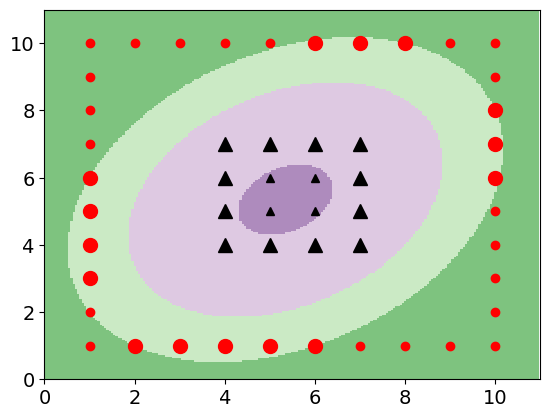

In [3]:
learn_and_display_SVM('data1.txt', 'quadratic', 1.0)

Also try `data2.txt` through `data5.txt`. Also try changing the value of `C` (the third parameter) to see how that affects the boundary and margin.

## 3. Experiments with the RBF kernel

Now experiment with the RBF kernel, on the same five data sets. This time there are two parameters to play with: `C` and `sigma`.

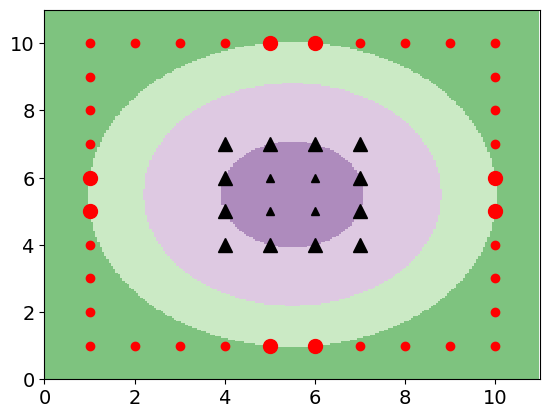

In [4]:
learn_and_display_SVM('data1.txt', 'rbf', 10.0, 10.0)

## 4. The kernel Perceptron

<font color="magenta">**For you to do:**</font> Implement the kernel Perceptron algorithm as specified in lecture. Your algorithm should allow both the quadratic and RBF kernel, and should follow roughly the same signature as the SVM routine above:
* `learn_and_display_Perceptron(datafile, kernel_type, s_value)`

Recall that the Perceptron algorithm does not always converge; you will need to explicitly check for this.

In [5]:
### 
### Any auxiliary functions that you need
import pprint 
def read_dataset(datafile):
    data = np.loadtxt(datafile)
    n,d = data.shape
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    return x,y

def polynomial(x,z,degree = 2):
    k = (1 + np.dot(x,z)) ** degree
    return k

def predict_train(alpha,y,X,x,b,s_value = None,kernel_type = 'quadratic'):

   # np.sum(np.dot(alpha,np.dot(y.T,polynomial(X,x.T))))
    if kernel_type == 'quadratic' :
        return np.sum(alpha * y * polynomial(X,x.T))+b
    else :
        return np.sum(alpha * y * rbf(X,x.T , s_value)) + b
        

def predict(alpha,y,X,x,b):
    if predict_train(alpha,y,X,x,b) > 0 :
        return 1
    else:
        return -1 


def rbf(x,z , s_value):
    xvalues = np.array([np.linalg.norm(x[j]-z) for j in range(len(x))])
    Exp = np.array([np.exp(-xvalues[j]**2/s_value**2) for j in range(len(xvalues))])
    
    return Exp
    # np.exp( - (( np.linalg.norm(x - z) ** 2 )/ (s_value** 2)))




def learn_and_display_Perceptron(datafile, kernel_type='rbf', s_value=1.0 , iter_n = 100):
    ###
    ### Your code
    x,y = read_dataset(datafile)
    n,d = x.shape
    # vector of alpha any point in it will increase if any update done on it
    alpha = np.zeros(n)
    b = 0
    iters = 0
   # kernel_perceptron_quadratic(x, y, n_iters=1)
    done = False
    converg = False
    while not done :
        done = True
        converg = True
        I = np.random.permutation(n)
        for o in range (n) :
            i = I[o]
            if y[i] * (predict_train(alpha,y,x,x[i],b,s_value,kernel_type)) <= 0:
                alpha[i] = alpha[i] + 1
                b = b + y[i]
                done = False
        iters += 1
        if iters >= iter_n:
            done = True
            converg = False
    
    if converg :
        print('converged in step ' , iters)
    else :
        print('non converged in steps ' , iter_n)
    



    return alpha ,b , converg

    

In [6]:
# test the base
# test the error

#x,y = read_dataset('data1.txt')
alpha ,b,converg = learn_and_display_Perceptron('data1.txt', kernel_type='rbf', s_value=1.0,iter_n = 2000)


converged in step  2


### OOP

In [7]:
class perceptron_kernal():
    def __init__(self,x,y,kernal = 'rbf',iter_n = 100,s_value = None,degree = None):
        self.x = x
        self.y = y
        self.kernal = kernal
        self.iter_n = iter_n
        self.s_value = s_value
        self.degree = degree
        self.alpha = np.zeros(self.x.shape[0])
        self.b = 0
    
    def __polynomial(self,z):
        k = (1 + np.dot(self.x,z)) ** self.degree
        return k

    def __rbf(self,z):
        xvalues = np.array([np.linalg.norm(self.x[j]-z) for j in range(len(self.x))])
        Exp = np.array([np.exp(-xvalues[j]**2/self.s_value**2) for j in range(len(xvalues))])
    
        return Exp
        # np.exp( - (( np.linalg.norm(x - z) ** 2 )/ (s_value** 2)))

    def __predict(self,z):
        # np.sum(np.dot(alpha,np.dot(y.T,polynomial(X,x.T))))
        if self.kernal == 'quadratic' :
            return np.sum(self.alpha * self.y * self.__polynomial(z.T)) + self.b
        else :
            return np.sum(self.alpha * self.y * self.__rbf(z.T)) + self.b
        

    def __predict_one(self,z):
        if self.__predict(z) >= 0:
            return 1
        else:
            return -1
         



    def predict(self, x_test):
            if np.sum(self.alpha) == 0:
                print('fit first ..')
            else:
                y_hat = np.array([self.__predict_one(x_test[i]) for i in range(len(x_test))])
                return y_hat
    
    def score(self,y,x_test):
        if np.sum(self.alpha) == 0:
            print('fit first ..')
        else:
            y_hat = np.array([self.__predict_one(x_test[i]) for i in range(len(x_test))])
            score = np.sum(y == y_hat) / len(y)
            return score 



    def fit(self):
        n,d = self.x.shape
        # vector of alpha any point in it will increase if any update done on it
        iters = 0
        done = False
        converg = False
        while not done :
            done = True
            self.converg = True
            I = np.random.permutation(n)
            for o in range (n) :
                i = I[o]
                if self.y[i] * (self.__predict(self.x[i])) <= 0:
                    self.alpha[i] = self.alpha[i] + 1
                    self.b = self.b + self.y[i]
                    done = False
            iters += 1
            if iters >= self.iter_n:
                done = True
                self.converg = False
        if self.converg :
            print('converged in step ' , iters)
        else :
            print('non converged in steps ' , self.iter_n)
    def to_plot(self):
        return self.alpha , self.b , self.converg,self.kernal,self.x,self.y


def learn_and_display_Perceptron(clf):
    alpha , b , converged,kernel_type,x,y = clf.to_plot()
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    plt.plot(x[(y==1),0], x[(y==1),1], 'rD')
    plt.plot(x[(y==-1),0], x[(y==-1),1], 'k^')
    # Construct a grid of points at which to evaluate the classifier
    if converged:
        grid_spacing = 0.05
        xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
        grid = np.c_[xx1.ravel(), xx2.ravel()]
        #print(grid[0], x[1,:])
        Z = np.array([clf.predict(grid)])
        # Show the classifier's boundary using a color plot
        Z = Z.reshape(xx1.shape)
        plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.RdBu, vmin=-2, vmax=2)
    plt.show()                    

        

In [8]:
x,y = read_dataset('data1.txt')
clf = perceptron_kernal(x,y,'quadratic',1500,degree=2)
clf.fit()


converged in step  1164


In [9]:
clf.score(y,x)

1.0

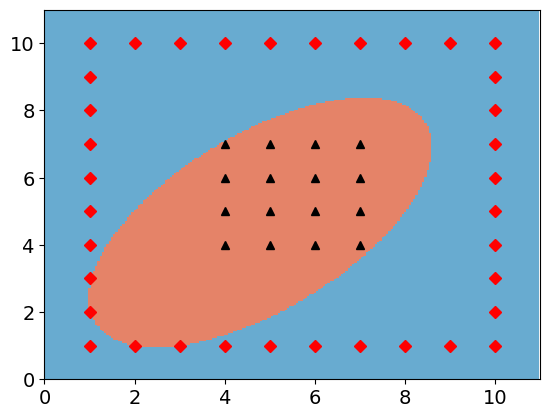

In [10]:
learn_and_display_Perceptron(clf)

<font color="magenta">Experiment with your routine, on the same five data sets.</font>

converged in step  2


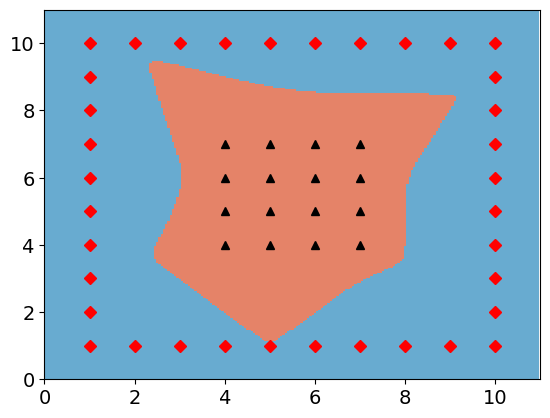

converged in step  2


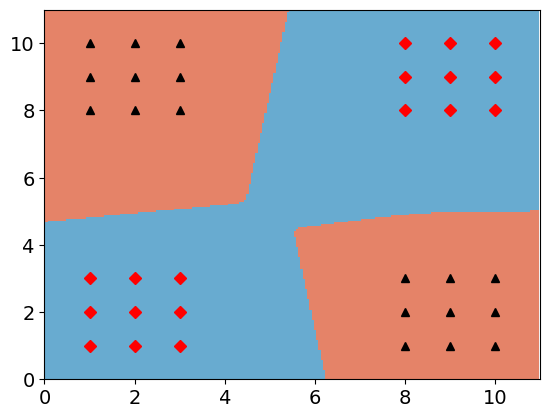

converged in step  3


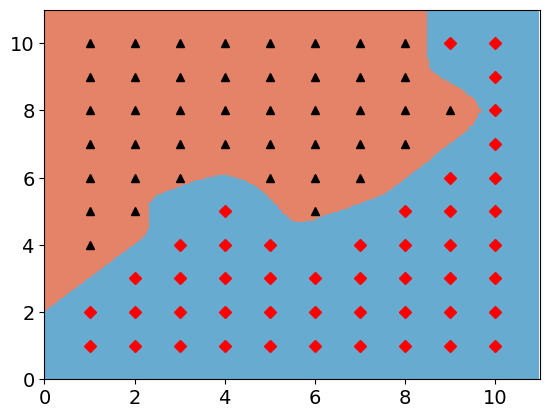

converged in step  2


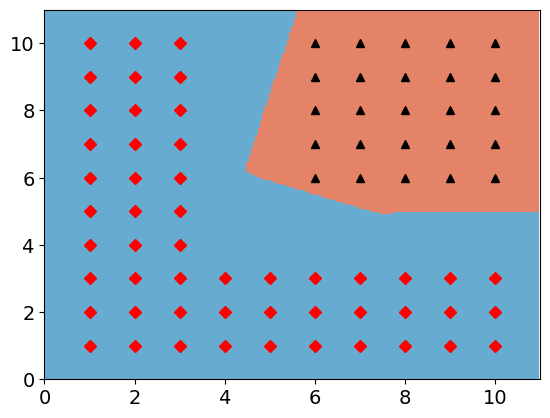

converged in step  2


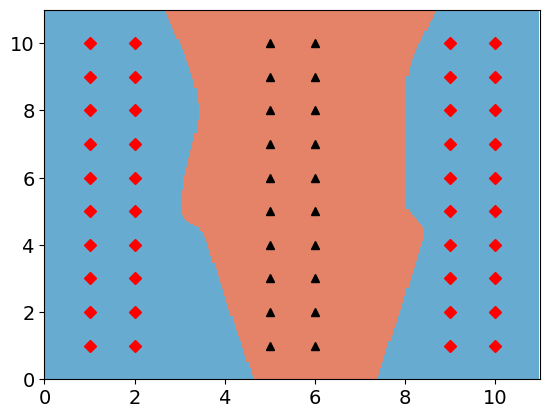

In [11]:
dataset  = ['data1.txt','data2.txt','data3.txt','data4.txt','data5.txt']
for j in dataset:
    x,y = read_dataset(j)
    clf = perceptron_kernal(x,y,'rbf',100,s_value=1.0)
    clf.fit()
    learn_and_display_Perceptron(clf)